Let's practice webscraping with the modules BeautifulSoup4 and requests!

In [17]:
# -*- encoding: utf-8 -*-

from bs4 import BeautifulSoup #https://www.crummy.com/software/BeautifulSoup/bs4/doc/
import requests #http://docs.python-requests.org/en/master/
import io

#point this at the place where you want to put your work
project_folder  = r"C:\Users\AI\Documents\Projects\Python\DSFS\periodicDisclosures"

#this is a well known webscraper practice site
target = r"http://books.toscrape.com"

When we get our data, let's save it to file so we can process it in stages without pinging the host website all the time.

In [19]:

data = requests.get(target) #get html document

data = BeautifulSoup(data.text,"html5lib") #tranform to BeautifulSoup object
with io.open(project_folder + r"\Practice\target_page1.html","w",encoding="utf-8") as f:
    for line in data.prettify():
        f.write(line)

Let's now read the data from file and continue! If you close the notebook and continue later, you can just run the cells from here on without revisiting the website.

In [20]:
htmldoc = ""

with open(project_folder+r"\Practice\target_page1.html","rb") as f:
    for line in f:
        htmldoc = htmldoc+line
        

htmldoc should now contain the html text data

In [21]:
print htmldoc

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

Yep, it's all there!

It's quite a long document, but it's important that we peruse it a bit to try to understand the structure. Better than reading it in plain text is to put it into your favourite text editor (mine is SublimeText3), preferably one that will automatically apply coloured syntax for html code. 

Let's try to extract:
1. All the genres in the list on the sidebar of the original page
2. All the links on the page


If we look closely, the information we want resides in a sequence of "a" tags, deep inside a bunch of other stuff 


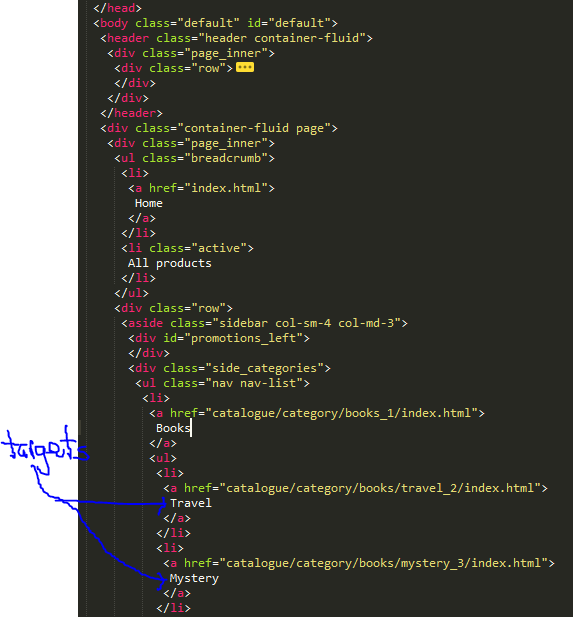



So how do we navigate through the html to extract the desired information? BeautifulSoup4 allows us transform an html document into a complex tree of python objects. We can then navigate this tree for the information desired or edit the html as we please!

Let's get all the genre names first. 

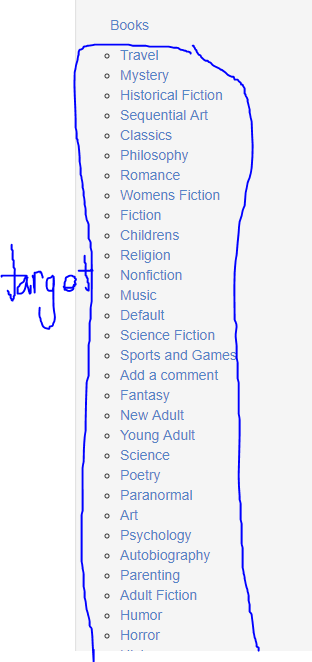

1.


In [147]:
soup = BeautifulSoup(htmldoc,"html5lib")

#choose convenient tag that is parent to all things I want and not much else
sidebar =soup.find(class_="side_categories")

#navigate through local tags to parent tag of genres-containing tags
part_that_has_genres = sidebar.ul.li.ul

#get all stripped strings from all tags, should only be the genres
genres = [str(string) for string in part_that_has_genres.stripped_strings]

#there's a weird "Add a comment" bit in the middle, let's drop that
real_genres  = [x for x in genres if x != "Add a comment"]

print real_genres

['Travel', 'Mystery', 'Historical Fiction', 'Sequential Art', 'Classics', 'Philosophy', 'Romance', 'Womens Fiction', 'Fiction', 'Childrens', 'Religion', 'Nonfiction', 'Music', 'Default', 'Science Fiction', 'Sports and Games', 'Fantasy', 'New Adult', 'Young Adult', 'Science', 'Poetry', 'Paranormal', 'Art', 'Psychology', 'Autobiography', 'Parenting', 'Adult Fiction', 'Humor', 'Horror', 'History', 'Food and Drink', 'Christian Fiction', 'Business', 'Biography', 'Thriller', 'Contemporary', 'Spirituality', 'Academic', 'Self Help', 'Historical', 'Christian', 'Suspense', 'Short Stories', 'Novels', 'Health', 'Politics', 'Cultural', 'Erotica', 'Crime']


2 .Getting all the links on a page is pretty easy:


In [144]:
all_links  = soup.find_all(href=True)
for x in all_links:
    print x["href"]
    
    
    

static/oscar/favicon.ico
static/oscar/css/styles.css
static/oscar/js/bootstrap-datetimepicker/bootstrap-datetimepicker.css
static/oscar/css/datetimepicker.css
index.html
index.html
catalogue/category/books_1/index.html
catalogue/category/books/travel_2/index.html
catalogue/category/books/mystery_3/index.html
catalogue/category/books/historical-fiction_4/index.html
catalogue/category/books/sequential-art_5/index.html
catalogue/category/books/classics_6/index.html
catalogue/category/books/philosophy_7/index.html
catalogue/category/books/romance_8/index.html
catalogue/category/books/womens-fiction_9/index.html
catalogue/category/books/fiction_10/index.html
catalogue/category/books/childrens_11/index.html
catalogue/category/books/religion_12/index.html
catalogue/category/books/nonfiction_13/index.html
catalogue/category/books/music_14/index.html
catalogue/category/books/default_15/index.html
catalogue/category/books/science-fiction_16/index.html
catalogue/category/books/sports-and-games_17

If you wanted to filter these results to only collect certain links, filter your soup selection first and then apply the same href search!